In [1]:
import numpy as np
import numpy.random as random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style("darkgrid")

plt.rcParams['figure.figsize'] = (12, 6)

# Significance Tests

A typical question we may have about two or more samples of data is whether they have the same distribution. Parametric statistical significance tests are those statistical methods that assume data comes from the same Gaussian distribution, that is a data distribution with the same mean and standard deviation: the parameters of the distribution. Check out [Data Distributions (Gaussian, t, Chi-Squared)](https://www.kaggle.com/code/mattop/data-distributions-gaussian-t-chi-squared) for more on data distributions. Below are some commonly used significance tests:

- The Student’s t-test for quantifying the difference between the mean of two independent data samples.

- The paired Student’s t-test for quantifying the difference between the mean of two dependent data samples.

- The ANOVA and repeated measures ANOVA for checking the similarity or difference between the means of 2 or more data samples.

The p-value is used in the context of null hypothesis testing in order to quantify the statistical significance of a result. The lower the p-value is, the lower the probability of getting that result if the null hypothesis were true. A result is said to be statistically significant if it allows us to reject the null hypothesis. All other things being equal, smaller p-values are taken as stronger evidence against the null hypothesis.

- p-value ≤ alpha: significant result, reject null hypothesis (H0), distributions differ.

- p-value > alpha: not significant result, fail to reject null hypothesis (H0), distributions same.

The p-value can be interpreted in the context of a chosen significance level called alpha. A common value for alpha is 5%, or 0.05. If the p-value is below the significance level, then the test says there is enough evidence to reject the null hypothesis and that the samples were likely drawn from populations with differing distributions.

# Create data for testing

In [2]:
random.seed(10)

sample_1 = 5 * random.randn(100) + 50
sample_2 = 5 * random.randn(100) + 51
sample_3 = 5 * random.randn(100) + 52

print("sample_1: mean = %.3f, std = %.3f" % (np.mean(sample_1), np.std(sample_1)))
print("sample_2: mean = %.3f, std = %.3f" % (np.mean(sample_2), np.std(sample_2)))
print("sample_3: mean = %.3f, std = %.3f" % (np.mean(sample_3), np.std(sample_3)))

sample_1: mean = 50.397, std = 4.835
sample_2: mean = 51.346, std = 4.927
sample_3: mean = 51.880, std = 4.567


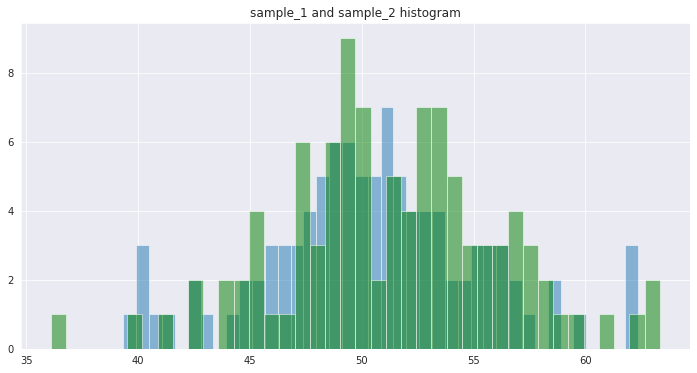

In [3]:
plt.hist(sample_1, bins = 40, alpha = 0.5)
plt.hist(sample_2, bins = 40, alpha = 0.5, color = "green")
plt.title("sample_1 and sample_2 histogram")
plt.show()

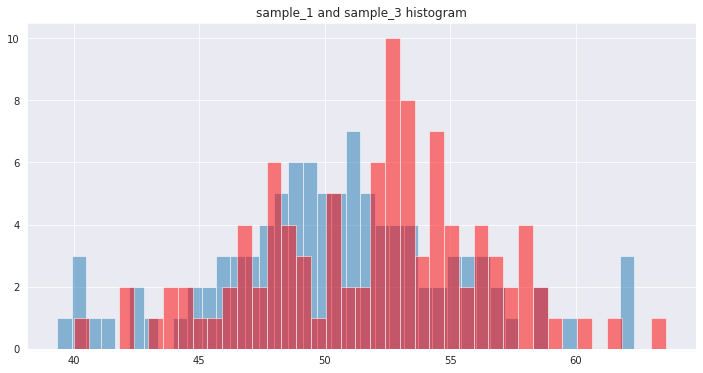

In [4]:
plt.hist(sample_1, bins = 40, alpha = 0.5)
plt.hist(sample_3, bins = 40, alpha = 0.5, color = "red")
plt.title("sample_1 and sample_3 histogram")
plt.show()

# Student’s t-Test

📌 - Let's first compare sample_1 and sample_2: 
- sample_1: mean = 50.397, std = 4.835
- sample_2: mean = 51.346, std = 4.927

In [5]:
stat, p_value = stats.ttest_ind(sample_1, sample_2)
print("Statistics = %.3f, p-value = %.3f" % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print("Same distributions (fail to reject H0)") 
else:
    print("Different distributions (reject H0)")

Statistics = -1.368, p-value = 0.173
Same distributions (fail to reject H0)


The p-value is not small enough to reject the null hypothesis in this instance even though we created the sample means to be slightly different.

📌 - Now we can compare sample_1 and sample_3: 
- sample_1: mean = 50.397, std = 4.835
- sample_3: mean = 51.880, std = 4.567

In [6]:
stat, p_value = stats.ttest_ind(sample_1, sample_3)
print("Statistics = %.3f, p-value = %.3f" % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print("Same distributions (fail to reject H0)") 
else:
    print("Different distributions (reject H0)")

Statistics = -2.219, p-value = 0.028
Different distributions (reject H0)


The p-value is now small enough to reject the null hypothesis in this instance.

# Paired Student’s t-Test

A dependent samples t-test is also used to compare two means on a single dependent variable. Unlike the independent samples test, however, a dependent samples t-test is used to compare the means of a single sample or of two matched or paired samples. The paired Student’s t-test can be implemented using the ttest_rel() SciPy function.

# Analysis of Variance Test (ANOVA)

ANOVA is a statistical test that assumes that the mean across 2 or more groups are equal. If the evidence suggests that this is not the case, the null hypothesis is rejected and at least one data sample has a different distribution.

- Fail to Reject H0: All sample distributions are equal.
- Reject H0: One or more sample distributions are not equal.

Importantly, the test can only comment on whether all samples are the same or not; it cannot quantify which samples differ or by how much.

In [7]:
random.seed(20)

sample_4 = 5 * random.randn(100) + 50
sample_5 = 5 * random.randn(100) + 50
sample_6 = 5 * random.randn(100) + 52

print("sample_4: mean = %.3f, std = %.3f" % (np.mean(sample_4), np.std(sample_4)))
print("sample_5: mean = %.3f, std = %.3f" % (np.mean(sample_5), np.std(sample_5)))
print("sample_6: mean = %.3f, std = %.3f" % (np.mean(sample_6), np.std(sample_6)))
print("-" * 35)

stat, p_value = stats.f_oneway(sample_4, sample_5, sample_6)
print("Statistics = %.3f, p-value = %.3f" % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    print("Same distributions (fail to reject H0)") 
else:
    print("Different distributions (reject H0)")

sample_4: mean = 49.727, std = 5.363
sample_5: mean = 50.433, std = 5.000
sample_6: mean = 51.814, std = 4.423
-----------------------------------
Statistics = 4.563, p-value = 0.011
Different distributions (reject H0)
